In [614]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import string

In [615]:
df=pd.read_csv('hin.txt',encoding='utf-8',sep='\t',names=['x1','x2','y'])
df.head()

,x1,x2,y
0,Wow!,वाह!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
1,Duck!,झुको!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Duck!,बतख़!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Help!,बचाओ!,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
4,Jump.,उछलो.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...


In [616]:
df.drop(columns=['y'],inplace=True)
df['x2']

0                                                    वाह!
1                                                   झुको!
2                                                   बतख़!
3                                                   बचाओ!
4                                                   उछलो.
                              ...                        
2974    उस सूपरमार्केट में तुम लगभग कोई भी रोजाने में ...
2975    जिन यात्रियों को दुर्घटना मे चोट आई थी उन्हे अ...
2976    लोकतंत्र सरकार का सबसे घिनौना रूप है, अगर बाकी...
2977    अगर मेरा बेटा ट्रेफ़िक हादसे में नहीं मारा गया...
2978    जब मैं बच्चा था, मुझे कीड़ों को छूने से कोई पर...
Name: x2, Length: 2979, dtype: object

In [617]:
translator= str.maketrans('','', string.punctuation)
# dropping all  the punctuations from text data
df['x1'] = df['x1'].apply(lambda x: x.translate(translator))
df['x2'] = df['x2'].apply(lambda x: x.translate(translator))
df['x1']=df['x1'].str.lower()
df['x2']=df['x2'].str.lower()
eng=df['x1'].apply(lambda x: contractions.fix(x))
hin=df['x2'].apply(lambda x: contractions.fix(x))


In [618]:
hin=['sos '+x+' eos' for x in hin]

In [619]:
eng=eng.str.split()
eng

0                                                   [wow]
1                                                  [duck]
2                                                  [duck]
3                                                  [help]
4                                                  [jump]
                              ...                        
2974    [if, you, go, to, that, supermarket, you, can,...
2975    [the, passengers, who, were, injured, in, the,...
2976    [democracy, is, the, worst, form, of, governme...
2977    [if, my, boy, had, not, been, killed, in, the,...
2978    [when, i, was, a, kid, touching, bugs, did, no...
Name: x1, Length: 2979, dtype: object

In [620]:
hin=[x.split() for x in hin]

In [621]:
hin

[['sos', 'वाह', 'eos'],
 ['sos', 'झुको', 'eos'],
 ['sos', 'बतख़', 'eos'],
 ['sos', 'बचाओ', 'eos'],
 ['sos', 'उछलो', 'eos'],
 ['sos', 'कूदो', 'eos'],
 ['sos', 'छलांग', 'eos'],
 ['sos', 'नमस्ते।', 'eos'],
 ['sos', 'नमस्कार।', 'eos'],
 ['sos', 'वाहवाह', 'eos'],
 ['sos', 'चियर्स', 'eos'],
 ['sos', 'सांस', 'छोड़।', 'eos'],
 ['sos', 'सांस', 'छोड़ो।', 'eos'],
 ['sos', 'समझे', 'कि', 'नहीं', 'eos'],
 ['sos', 'मैं', 'ठीक', 'हूँ।', 'eos'],
 ['sos', 'सांस', 'ले।', 'eos'],
 ['sos', 'सांस', 'लो।', 'eos'],
 ['sos', 'धन्यवाद', 'eos'],
 ['sos', 'हम', 'जीते।', 'eos'],
 ['sos', 'बहुत', 'बढ़िया', 'eos'],
 ['sos', 'अंदर', 'आ', 'जाओ।', 'eos'],
 ['sos', 'बाहर', 'निकल', 'जाओ', 'eos'],
 ['sos', 'चले', 'जाओ', 'eos'],
 ['sos', 'ख़ुदा', 'हाफ़िज़।', 'eos'],
 ['sos', 'उत्तम', 'eos'],
 ['sos', 'सही', 'eos'],
 ['sos', 'हम', 'हार', 'गए।', 'eos'],
 ['sos', 'आपका', 'स्वागत', 'है।', 'eos'],
 ['sos', 'स्वागतम्।', 'eos'],
 ['sos', 'मज़े', 'करना।', 'eos'],
 ['sos', 'मौज', 'करना।', 'eos'],
 ['sos', 'मज़े', 'करो।', 'eos'],
 [

In [622]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokeniser1=Tokenizer(oov_token=2)
tokeniser1.fit_on_texts(eng)
eng_seq=tokeniser1.texts_to_sequences(eng)
tokeniser2=Tokenizer(oov_token=2)
tokeniser2.fit_on_texts(hin)
hin_seq=tokeniser2.texts_to_sequences(hin)

In [623]:
max_englen=max([len(s) for s in eng_seq])
max_hinlen=max([len(s) for s in hin_seq])
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [624]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(eng_seq,hin_seq,random_state=12,test_size=0.2)

In [625]:
decoder_input_data=[x[:-1] for x in y_train]
decoder_output_data=[x[1:] for x in y_train]

In [626]:
eng_input=pad_sequences(x_train,maxlen=max_englen,padding='post')
hin_pad_input=pad_sequences(decoder_input_data,maxlen=26,padding='post')
hin_pad_output=pad_sequences(decoder_output_data,maxlen=26,padding='post')

In [627]:
from tensorflow.keras.layers import Input,Embedding,LSTM,Bidirectional,Dense,Concatenate
from tensorflow.keras import Model

In [628]:
eng_vocab=len(tokeniser1.word_index)+1
hin_vocab=len(tokeniser2.word_index)+1
eng_vocab

2367

In [629]:
len(tokeniser2.word_index)

3063

In [656]:
#encoder
encoder_inputs = Input(shape=(23,))
encoder_embedding = Embedding(eng_vocab, 512)(encoder_inputs)
encoder_lstm, state_h, state_c = LSTM(512, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]
encoder_model=Model(encoder_inputs,encoder_states)

In [683]:
h,c=encoder_model.predict(eng_input[1110].reshape(1,23))
h1,c1=encoder_model.predict(eng_input[1109].reshape(1,23))

1/1 [==============================] - 0s 18ms/step


In [631]:
#translator
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(hin_vocab, 512,)(decoder_inputs)
decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(hin_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [632]:
model=Model([encoder_inputs,decoder_inputs],decoder_outputs)
model.summary()

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_95 (InputLayer)       [(None, 23)]                 0         []                            
                                                                                                  
 input_96 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_56 (Embedding)    (None, 23, 512)              1211904   ['input_95[0][0]']            
                                                                                                  
 embedding_57 (Embedding)    (None, None, 512)            1568768   ['input_96[0][0]']            
                                                                                           

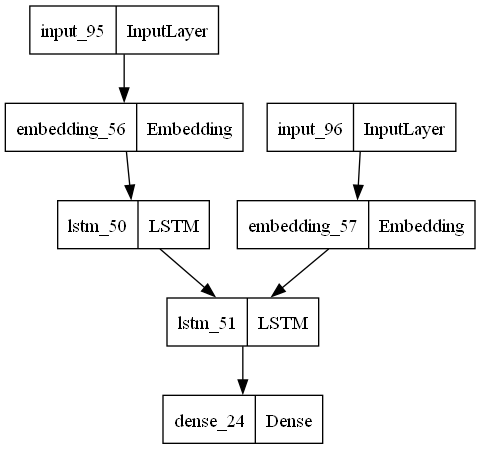

In [633]:
from keras.utils import plot_model
plot_model(model)

In [645]:
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
# decoder_hidden_state_input = Input(shape=(26,512)) 
decoder_embedding=Embedding(hin_vocab, 512)(decoder_inputs)
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model= Model(
                    [decoder_inputs] + [decoder_state_input_h,decoder_state_input_c],
                     [decoder_outputs]+ decoder_states)

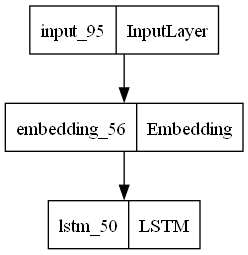

In [646]:
plot_model(encoder_model)

Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_96 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_59 (Embedding)    (None, None, 512)            1568768   ['input_96[0][0]']            
                                                                                                  
 input_100 (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 input_101 (InputLayer)      [(None, 512)]                0         []                            
                                                                                           

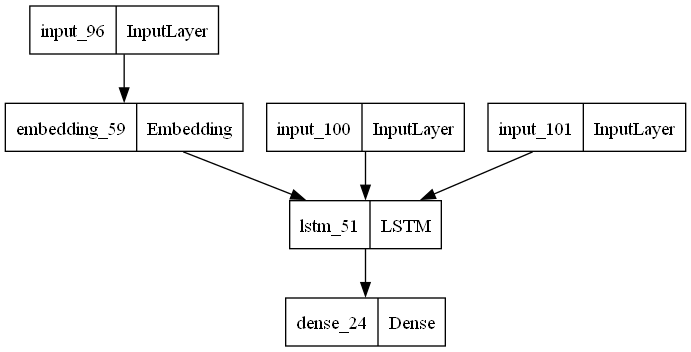

In [647]:
decoder_model.summary()
plot_model(decoder_model)

In [648]:
# def build_encoder(vocab_size, embedding_dim, lstm_units):
#     encoder_inputs = Input(shape=(23,))
#     encoder_embedding = Embedding(vocab_size, embedding_dim)(encoder_inputs)
#     encoder_lstm, state_h, state_c = LSTM(lstm_units, return_state=True)(encoder_embedding)
#     encoder_states = [state_h, state_c]
#     return encoder_inputs, encoder_lstm, encoder_states

# # Define the decoder
# def build_decoder(vocab_size, embedding_dim, lstm_units,encoder_states):
#     decoder_inputs = Input(shape=(None,))
#     decoder_embedding = Embedding(vocab_size, embedding_dim)(decoder_inputs)
#     decoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True)
#     decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=encoder_states)
#     decoder_dense = Dense(vocab_size, activation='softmax')
#     decoder_outputs = decoder_dense(decoder_outputs)
#     return decoder_inputs, decoder_outputs

# # Define the model
# def build_model(encoder_inputs, decoder_inputs, decoder_outputs):
#     model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
#     return model

# # Define vocabulary size and other hyperparameters
# vocab_size = 10000  # Example vocabulary size
# embedding_dim = 256
# lstm_units = 512

# # Build encoder and decoder
# encoder_inputs, encoder_lstm, encoder_states = build_encoder(eng_vocab, 512, 512)
# decoder_inputs, decoder_outputs= build_decoder(hin_vocab, 512, 512,encoder_states)

# # Build the model
# model = build_model(encoder_inputs, decoder_inputs, decoder_outputs)
# encoder_model=Model(encoder_inputs,encoder_states)
# # Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary

In [638]:
hin_pad_input[0].shape,eng_input[0].shape

((26,), (23,))

In [639]:
model.fit([eng_input,hin_pad_input],hin_pad_output,batch_size=50,epochs=10)

Epoch 1/10
48/48 [==============================] - 31s 562ms/step - loss: 2.5769 - accuracy: 0.6901
Epoch 2/10
48/48 [==============================] - 21s 438ms/step - loss: 1.9033 - accuracy: 0.7184
Epoch 3/10
48/48 [==============================] - 20s 416ms/step - loss: 1.6569 - accuracy: 0.7436
Epoch 4/10
48/48 [==============================] - 20s 425ms/step - loss: 1.5928 - accuracy: 0.7485
Epoch 5/10
48/48 [==============================] - 19s 404ms/step - loss: 1.5423 - accuracy: 0.7548
Epoch 6/10
48/48 [==============================] - 21s 427ms/step - loss: 1.4962 - accuracy: 0.7570
Epoch 7/10
48/48 [==============================] - 20s 411ms/step - loss: 1.4536 - accuracy: 0.7597
Epoch 8/10
48/48 [==============================] - 19s 404ms/step - loss: 1.4108 - accuracy: 0.7627
Epoch 9/10
48/48 [==============================] - 19s 390ms/step - loss: 1.3696 - accuracy: 0.7672
Epoch 10/10
48/48 [==============================] - 19s 393ms/step - loss: 1.3277 - accura

In [640]:
l=np.array([[[1,2,3,4,5,6,7]]])
sampled_token_index = np.argmax(l[0,-1,:])
sampled_token_index

6

In [700]:
hin_index_word=tokeniser2.index_word
hin_word_index=tokeniser2.word_index

def translation(input_):
    state_h,state_c=encoder_model.predict(input_)
    target_seq=np.zeros((1,1))
    target_seq[0,0]=hin_word_index['sos']
    stop_=False
    decoded_sentence=[]
    l=0
    while not stop_:
        output_,h,c=decoder_model.predict([target_seq]+[state_h,state_c])
        # print(output_.shape)
        
        sampled_token_index = np.argmax(output_[0,-1,:])
        # print(sampled_token_index)
        if sampled_token_index !=0:
            sampled_char = hin_index_word[sampled_token_index]
            decoded_sentence.append(sampled_char)
            # print(sampled_char)
            if (sampled_char == 'eos' ):
                stop_= True
        target_seq=np.zeros((1,1))
        target_seq[0,0]=sampled_token_index 
        state_h,state_c=h,c
        # =c
        l=l+1
        if(l>=28):
            break
    return decoded_sentence
translation(eng_input[1].reshape(1,23))

1/1 [==============================] - 0s 20ms/step
में
1/1 [==============================] - 0s 13ms/step
में
1/1 [==============================] - 0s 28ms/step


['में', 'में']

In [642]:
hin_index_word['sos']

KeyError: 'sos'

In [ ]:
# i_sentence=eng[2974]
# o_sentence=hin[29]
# eng_index_word=tokeniser1.index_word
# sent=tokeniser1.texts_to_sequences(sentence)
# _input=pad_sequences(sent,maxlen=max_englen,padding='post')

# ans=""
# for i in eng_input:
#     ans+=eng_index_word[i]+' '
# print(ans)

1/1 [==============================] - 0s 17ms/step


'  मैं ने हो हो eos'

In [ ]:
def translate_sentence(sentence, encoder_model, decoder_model, max_french_length):
    # Tokenize the input sentence
    sentence = preprocess_sentence(sentence)
    encoder_input = tokenizer_en.texts_to_sequences([sentence])
    encoder_input = pad_sequences(encoder_input, maxlen=max_english_length, padding='post')
    
    # Encode the input sentence to get the encoder states
    encoder_states = encoder_model.predict(encoder_input)
    
    # Initialize the decoder input with a start token
    decoder_input = np.zeros((1, 1))
    decoder_input[0, 0] = french_tokenizer.word_index['<start>']
    
    # Initialize the translation
    translated_sentence = ''
    
    for _ in range(max_french_length):
        # Predict the next word
        decoder_output, state_h, state_c = decoder_model.predict([decoder_input] + encoder_states)
        
        # Get the predicted word index
        predicted_word_index = np.argmax(decoder_output[0, -1, :])
        
        # If the predicted word is an end token, break
        if french_tokenizer.index_word[predicted_word_index] == '<end>':
            break
        
        # Add the predicted word to the translation
        translated_sentence += french_tokenizer.index_word[predicted_word_index] + ' '
        
        # Update the decoder input for the next iteration
        decoder_input = np.zeros((1, 1))
        decoder_input[0, 0] = predicted_word_index
        
        # Update the encoder states for the next iteration
        encoder_states = [state_h, state_c]
    
    return translated_sentence.strip()

# Example usage:
english_sentence = "How are you?"
translated_sentence = translate_sentence(english_sentence, encoder_model, decoder_model, max_french_length)
print("Translated Sentence:", translated_sentence)
